# Use Case 27 Agustus 2019

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
losses = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-losses.csv")
risk = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-risk.csv")
spec = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-spec.csv")

In [3]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [4]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [5]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Part 1

### 1. Join 3 tables using ID as key

In [6]:
losses_risk = pd.merge(losses,risk, how ='left', on = 'ID')
losses_risk.head()

,ID,normalized-losses,symboling
0,1,NaN,3
1,2,NaN,3
2,3,NaN,1
3,4,164.0,2
4,5,164.0,2


In [20]:
df = pd.merge(losses_risk, spec, how ='left', on = 'ID')
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2. Quick-look

In [21]:
#dimension
df.shape

(205, 27)

In [22]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [23]:
#top of data
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [24]:
df = df.set_index("ID")
df.head()

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
4,164.0,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
5,164.0,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [25]:
df.describe()

,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Identify missing value

In [26]:
df.isnull().sum()

normalized-losses    41
symboling             0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Berdasarkan pengecekan di atas, terdapat missing value pada beberapa variabel sehingga dilakukan imputasi menggunakan modus untuk data kategori dan median untuk data numerik.

In [38]:
mmodus = ['num-of-doors']
for feature in mmodus:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

mmedian = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for feature in mmedian:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].median())

In [39]:
df.isnull().sum()

normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Setelah dilakukan imputasi, tidak ada missing value pada seluruh data.

### 4. Perform visualization

#### a. Barchart

In [40]:
top_10=df.sort_values('price',ascending=False).head(10)
top_10

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,
75,115.0,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
17,115.0,0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
74,115.0,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
129,115.0,3,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
18,115.0,0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
50,115.0,0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
49,115.0,0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
73,142.0,3,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
72,115.0,-1,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0


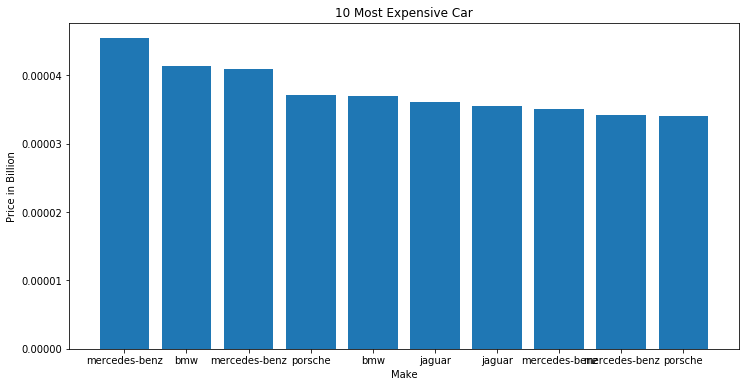

In [42]:
plt.figure(figsize=(12,6))

x=range(10)
plt.bar(x,top_10['price']/10**9)
plt.xticks(x,top_10['make'])
plt.xlabel('Make')
plt.ylabel('Price in Billion')
plt.title('10 Most Expensive Car')
plt.show()

#### b. Pie Chart

In [48]:
top_10["body-style"].value_counts()

sedan          6
convertible    2
hardtop        2
Name: body-style, dtype: int64

In [52]:
piechart = {'body-style':['sedan', 'hardtop', 'convertible'],
            'count':[6,2,2]}
piechart = pd.DataFrame(piechart)
piechart

,body-style,count
0,sedan,6
1,hardtop,2
2,convertible,2


Wedges:  [<matplotlib.patches.Wedge object at 0x000001D468159630>, <matplotlib.patches.Wedge object at 0x000001D468159D68>, <matplotlib.patches.Wedge object at 0x000001D468164550>]
Texts:  [Text(-0.339919,1.04616,'sedan'), Text(-0.339919,-1.04616,'hardtop'), Text(0.889919,-0.646564,'convertible')]
Autotexts:  [Text(-0.18541,0.570634,'60.00'), Text(-0.18541,-0.570634,'20.00'), Text(0.48541,-0.352671,'20.00')]


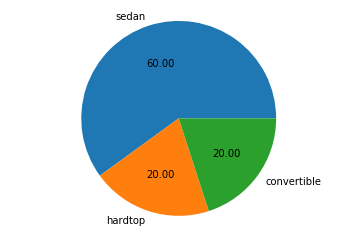

In [53]:
wedges, texts, autotexts = plt.pie(piechart['count'], 
                                    labels=piechart['body-style'],
                                    autopct='%.2f')

plt.axis('equal')

print('Wedges: ', wedges)
print('Texts: ', texts)
print('Autotexts: ', autotexts)

#### c. Scatterplot

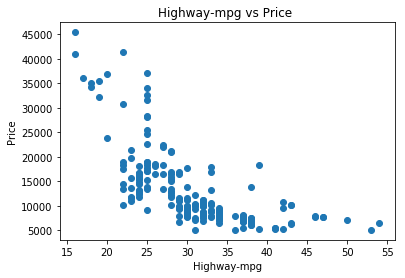

In [56]:
plt.scatter(df['highway-mpg'],df['price'])
plt.title('Highway-mpg vs Price ')
plt.xlabel('Highway-mpg')
plt.ylabel('Price')
plt.show()

#### d. Histogram

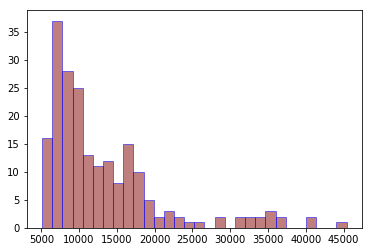

In [58]:
plt.hist(df['price'], 
         facecolor='maroon', 
         edgecolor='blue', 
         bins=30,
         alpha = 0.5)
plt.show()

#### e. Violinplot

In [59]:
df_array = np.array(df[['city-mpg', 'highway-mpg']])

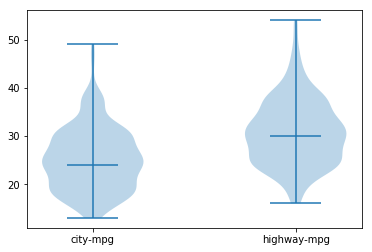

In [64]:
vp = plt.violinplot(df_array,
                    showmedians=True)

plt.xticks([1, 2], ['city-mpg', 'highway-mpg'])

plt.show()    

# Part 2

### 1. Car Brand with highest price

In [65]:
df.head()

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
4,164.0,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
5,164.0,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [66]:
price_highest=df.sort_values('price',ascending=False)
price_highest[['make', 'price']].head(1)

,make,price
ID,,
75,mercedes-benz,45400.0


### 2. Maximum horsepower for car with 6 cylinder engine

In [67]:
df.columns

Index(['normalized-losses', 'symboling', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type', 'cylinder',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [68]:
cylinder6 = df[df.cylinder == 'six']
horsepower_max = cylinder6['horsepower'].max()
print("The maximum horsepower for car with 6 cylinder engines is " + str(horsepower_max) + ".")

The maximum horsepower for car with 6 cylinder engines is 207.0.


### 3. Average peak-rpm for 'turbo' style aspiration car

In [69]:
df.head()

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
4,164.0,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
5,164.0,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [70]:
asp = df[df.aspiration == 'turbo']
peak_avg = asp['peak-rpm'].mean()
print("The average peak-rpm for 'turbo' style aspiration car is " + "{:.2f}".format(peak_avg) + ".")

The average peak-rpm for 'turbo' style aspiration car is 4939.19.


### 4. Average price based on body-style

In [102]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [103]:
sedan = df[df['body-style'] == 'sedan']
hatchback = df[df['body-style'] == 'hatchback']
wagon = df[df['body-style'] == 'wagon']
hardtop = df[df['body-style'] == 'hardtop']
convertible = df[df['body-style'] == 'convertible']

avgs = sedan['price'].mean()
avghb = hatchback['price'].mean()
avgw = wagon['price'].mean()
avght = hardtop['price'].mean()
avgc = convertible['price'].mean()

bodystyle = {'body-style':['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'],
             'average of price':[avgs, avghb, avgw, avght, avgc]}
bodystyle = pd.DataFrame(bodystyle)
bodystyle

,average of price,body-style
0,14372.989583,sedan
1,9967.085714,hatchback
2,12371.960000,wagon
3,22208.500000,hardtop
4,21890.500000,convertible


### 5. Average price based on body-style only for Honda car

In [106]:
honda = df[df.make == 'honda']
honda["body-style"].value_counts()

hatchback    7
sedan        5
wagon        1
Name: body-style, dtype: int64

In [107]:
sedan = honda[honda['body-style'] == 'sedan']
hatchback = honda[honda['body-style'] == 'hatchback']
wagon = honda[honda['body-style'] == 'wagon']

avgs = sedan['price'].mean()
avghb = hatchback['price'].mean()
avgw = wagon['price'].mean()

bodystyle = {'body-style':['sedan', 'hatchback', 'wagon'],
             'average of price':[avgs, avghb, avgw]}
bodystyle = pd.DataFrame(bodystyle)
bodystyle

,average of price,body-style
0,9945.000000,sedan
1,7054.428571,hatchback
2,7295.000000,wagon
